In [319]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# get data

In [320]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv',na_values = '?')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

#  clean/fix data

### drop time since first/last std diagnosis columns

In [322]:
df = df.drop('STDs: Time since first diagnosis',axis = 1)
df = df.drop('STDs: Time since last diagnosis',axis = 1)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


### impute missing values as mean

In [323]:
df = df.fillna(df.mean())
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [324]:
# split independent variables and dependent variable

vars = df.drop('Biopsy',axis = 1)
result = df['Biopsy']
result.value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

# prepare data for training/testing

### split data into training data and testing data

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
vars_train,vars_test,result_train,result_test = train_test_split(vars,result,test_size = 0.2,random_state = 1)

In [327]:
vars_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
408,17,2.000000,15.0,2.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.001328,0.002656,0,0,0,0,0,0,0,0
207,26,3.000000,18.0,2.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
61,35,3.000000,20.0,5.0,1.0,19.0,19.0,1.000000,4.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
455,18,1.000000,16.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
331,27,1.000000,15.0,4.0,0.0,0.0,0.0,1.000000,2.282201,1.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,15,2.000000,14.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
767,15,2.000000,13.0,1.0,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.001328,0.002656,0,0,0,0,0,0,0,0
72,34,2.000000,21.0,2.0,0.0,0.0,0.0,1.000000,0.330000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0
235,25,2.000000,17.0,1.0,0.0,0.0,0.0,1.000000,0.500000,0.000000,...,0.000000,0.000000,0,0,0,0,0,0,0,0


In [328]:
vars_test

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
255,25,2.0,18.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
56,35,5.0,15.0,4.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
479,28,1.0,24.0,2.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
84,36,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0
589,41,3.0,18.0,4.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,16,3.0,14.0,2.0,0.0,0.0,0.0,1.0,1.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
202,27,2.0,13.0,2.0,1.0,7.0,1.4,1.0,3.00,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0
841,23,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
506,36,1.0,22.0,4.0,1.0,16.0,4.8,0.0,0.00,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0


In [329]:
result_train

408    0
207    0
61     0
455    0
331    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Biopsy, Length: 686, dtype: int64

In [330]:
result_test

255    0
56     0
479    0
84     0
589    0
      ..
543    0
202    0
841    0
506    0
766    0
Name: Biopsy, Length: 172, dtype: int64

### undersample majority

In [331]:
import imblearn
from collections import Counter
from numpy import where


In [332]:
result_train.value_counts()

Biopsy
0    643
1     43
Name: count, dtype: int64

In [333]:
undersample = imblearn.under_sampling.CondensedNearestNeighbour()
vars_train,result_train = undersample.fit_resample(vars_train,result_train)
result_train.value_counts()

Biopsy
0    101
1     43
Name: count, dtype: int64

In [334]:
# from imblearn.over_sampling import RandomOverSampler,SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# over = RandomOverSampler(sampling_strategy=0.1)
# vars_train,result_train = over.fit_resample(vars_train,result_train)
# result_train.value_counts()

In [335]:
# under = RandomUnderSampler(sampling_strategy=.5)
# vars_train,result_train = under.fit_resample(vars_train,result_train)
# result_train.value_counts()

### standardize scale of data

In [336]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [337]:
vars_train_scaled = scaler.fit_transform(vars_train)
vars_test_scaled = scaler.transform(vars_test)

In [338]:
vars_train_scaled

array([[-0.33737706,  1.31194215, -0.70344701, ..., -0.38987177,
        -0.66332496, -0.38987177],
       [-1.21669464, -0.40579718, -0.70344701, ..., -0.38987177,
        -0.66332496, -0.38987177],
       [-0.22746236,  0.16678259,  0.30953256, ..., -0.38987177,
        -0.66332496, -0.38987177],
       ...,
       [-0.77703585, -0.97837696, -0.0281273 , ..., -0.38987177,
        -0.66332496, -0.38987177],
       [-0.66712115, -0.40579718, -0.70344701, ..., -0.38987177,
         1.50755672, -0.38987177],
       [-0.88695055, -0.97837696,  0.30953256, ...,  2.56494588,
         1.50755672, -0.38987177]])

In [339]:
vars_test_scaled

array([[-0.33737706, -0.40579718,  0.30953256, ..., -0.38987177,
        -0.66332496, -0.38987177],
       [ 0.76176992,  1.31194215, -0.70344701, ..., -0.38987177,
        -0.66332496, -0.38987177],
       [-0.00763297, -0.97837696,  2.3354917 , ..., -0.38987177,
        -0.66332496, -0.38987177],
       ...,
       [-0.55720645, -0.40579718, -0.70344701, ..., -0.38987177,
        -0.66332496, -0.38987177],
       [ 0.87168462, -0.97837696,  1.66017199, ..., -0.38987177,
        -0.66332496, -0.38987177],
       [-0.77703585, -0.97837696, -1.04110687, ..., -0.38987177,
        -0.66332496, -0.38987177]])

# train model

# train model with xgboost

In [340]:
import xgboost as xgb

In [341]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.01, max_depth = 50, n_estimators = 2500, scale_pos_weight = 100).fit(vars_train,result_train)

In [342]:
print(str(xgb_model.score(vars_train_scaled,result_train)) + " accurate on training data")

0.8263888888888888 accurate on training data


In [343]:
print(str(xgb_model.score(vars_test_scaled,result_test)) + " accurate on testing data")

0.9011627906976745 accurate on testing data


# evaluate new model

In [344]:
from sklearn.metrics import classification_report



In [345]:

xgb_result_predict = xgb_model.predict(vars_test)
print(classification_report(result_test,xgb_result_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       160
           1       0.71      1.00      0.83        12

    accuracy                           0.97       172
   macro avg       0.85      0.98      0.91       172
weighted avg       0.98      0.97      0.97       172



In [346]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [347]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgb_model, vars, result, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.93852


Text(0.5, 80.7222222222222, 'actual')

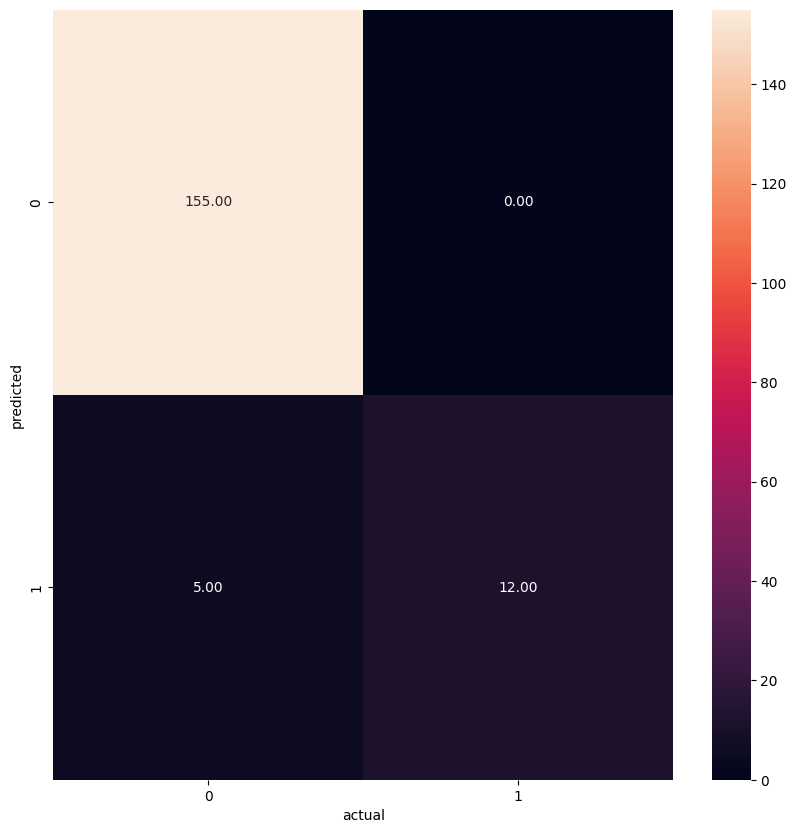

In [348]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(xgb_result_predict,result_test) 
sns.heatmap(cm,annot = True,fmt = '.2f')
plt.ylabel('predicted')
plt.xlabel('actual')

### save model

In [349]:
xgb_model.save_model("model.json")